# Importer les librairies

## Librairies pour importer, structurer explorer les données

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignorer les méssages d'avertissements
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Importation des données:

In [87]:
df = pd.read_excel("mostapha_pfe_1.xlsx")
# Let's take a look at the top of the dataset:
df.head()

,ID,Date,Ventes_ p1,Demande_P1,Ventes_ p2,Demande_p2,Ventes_p3,Demande_p3,Ventes_p4,Demande_ p4
0,1,2020-01-01,549.68,603.410313,711.68,603.613968,479.5,576.976831,299.5,152.245833
1,2,2020-01-02,635.40,697.509302,1047.44,888.390028,872.0,1049.267564,161.0,81.841667
2,3,2020-01-03,524.52,575.790965,1042.44,884.149260,883.0,1062.503737,260.5,132.420833
3,4,2020-01-04,550.84,604.683701,1190.78,1009.964368,829.0,997.526158,150.0,76.250000
4,5,2020-01-05,55.14,60.529844,27.34,23.188520,28.0,33.692078,0.0,0.000000


## **Exploration et préparation des données:**

In [88]:
# Pour voir les informations concernant toutes les colonnes, y compris le nombre de valeurs manquantes pour chacune:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID           1186 non-null   int64         
 1   Date         1186 non-null   datetime64[ns]
 2   Ventes_ p1   1186 non-null   float64       
 3   Demande_P1   1186 non-null   float64       
 4   Ventes_ p2   1186 non-null   float64       
 5   Demande_p2   1186 non-null   float64       
 6   Ventes_p3    1185 non-null   float64       
 7   Demande_p3   1186 non-null   float64       
 8   Ventes_p4    1186 non-null   float64       
 9   Demande_ p4  1186 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 92.8 KB


In [89]:
# Des statistiques descriptives pour les valeurs numériques :
df.describe()

,ID,Ventes_ p1,Demande_P1,Ventes_ p2,Demande_p2,Ventes_p3,Demande_p3,Ventes_p4,Demande_ p4
count,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1185.000000,1186.000000,1186.000000,1186.000000
mean,593.500000,485.340350,525.959619,907.736962,824.603483,742.071772,905.276420,208.508853,110.339994
std,342.513017,269.061023,285.361895,569.350035,528.044264,410.552585,488.124034,115.757562,78.269873
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,297.250000,333.545000,367.213289,361.045000,307.167315,490.500000,641.653587,140.625000,51.850000
50%,593.500000,547.720000,606.357192,1023.820000,908.754196,729.500000,890.216741,224.750000,116.916667
75%,889.750000,689.505000,728.685355,1318.260000,1206.000000,1053.500000,1267.514013,289.000000,155.740625
max,1186.000000,1251.500000,1295.496738,2231.060000,1892.281616,1738.500000,2091.917040,558.500000,359.000000


* **La distribution des ventes:**

<Axes: xlabel='Ventes_p4', ylabel='Count'>

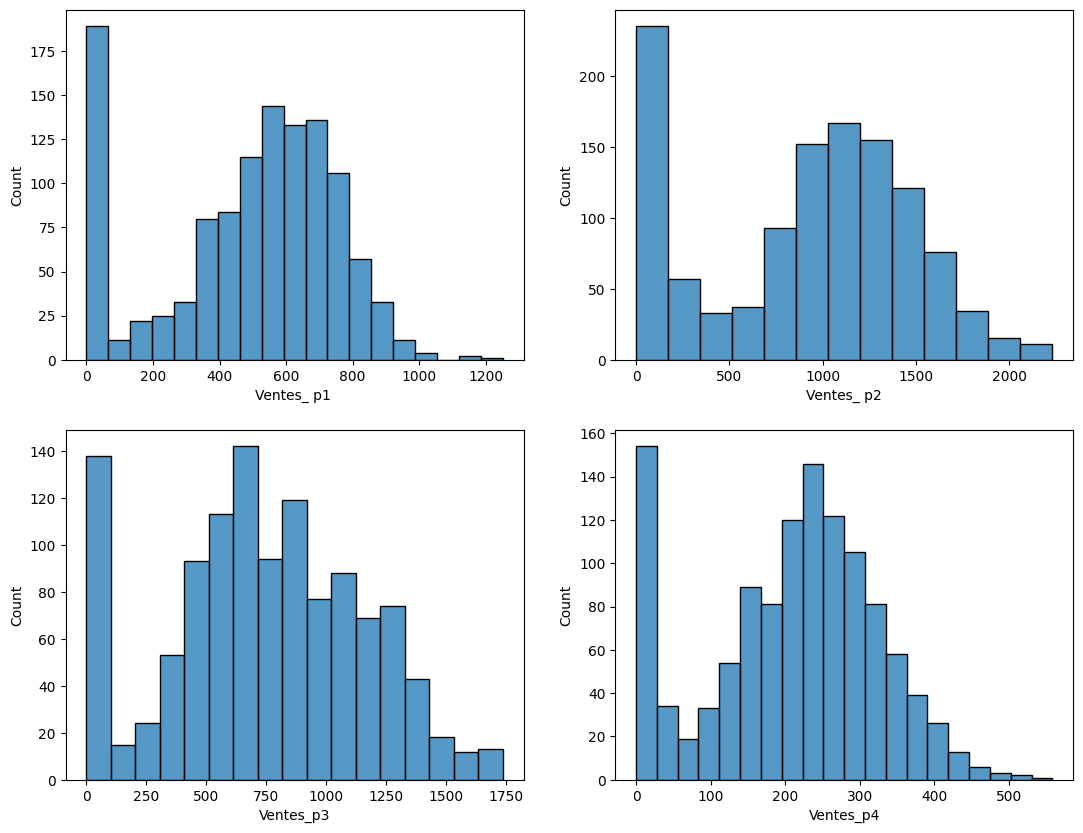

In [90]:
fig, axarr  = plt.subplots(2,2,figsize=(13,10))
sns.histplot(x='Ventes_ p1 ', data=df, ax=axarr[0,0])
sns.histplot(x='Ventes_ p2', data=df, ax=axarr[0,1])
sns.histplot(x='Ventes_p3', data=df, ax=axarr[1,0])
sns.histplot(x='Ventes_p4', data=df, ax=axarr[1,1])

*   **La destribution de la demende:**

<Axes: xlabel='Demande_ p4', ylabel='Count'>

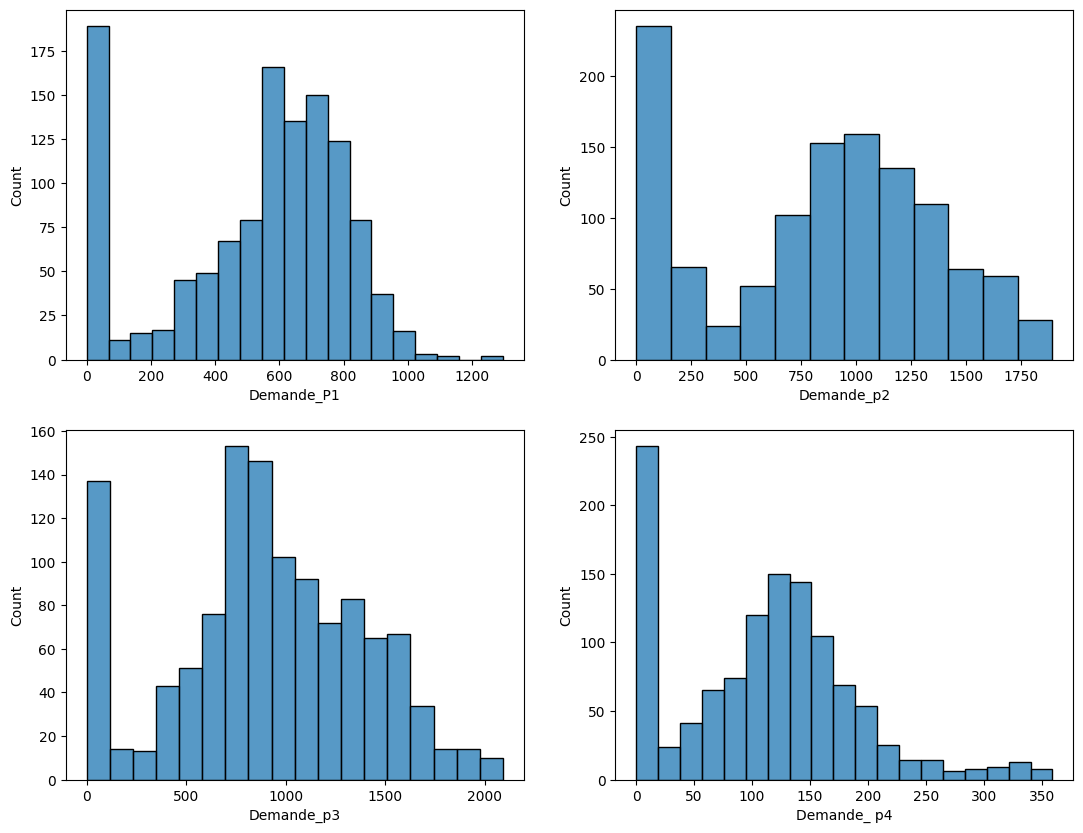

In [91]:
fig, axarr  = plt.subplots(2,2,figsize=(13,10))
sns.histplot(x='Demande_P1', data=df, ax=axarr[0,0])
sns.histplot(x='Demande_p2', data=df, ax=axarr[0,1])
sns.histplot(x='Demande_p3', data=df, ax=axarr[1,0])
sns.histplot(x='Demande_ p4', data=df, ax=axarr[1,1])

In [92]:
# Détection des valeurs manquantes:
df.isnull().sum()

ID             0
Date           0
Ventes_ p1     0
Demande_P1     0
Ventes_ p2     0
Demande_p2     0
Ventes_p3      1
Demande_p3     0
Ventes_p4      0
Demande_ p4    0
dtype: int64

In [93]:
# Détection des valeurs dupliquées:
df.duplicated().sum()

0

In [94]:
# Suppression des valeurs manquantes:
df = df.dropna()
df.isnull().sum()

ID             0
Date           0
Ventes_ p1     0
Demande_P1     0
Ventes_ p2     0
Demande_p2     0
Ventes_p3      0
Demande_p3     0
Ventes_p4      0
Demande_ p4    0
dtype: int64

### Détection des valeurs aberrantes:

1.   **Methode graphique:** *La boîte à moustaches*

<Axes: >

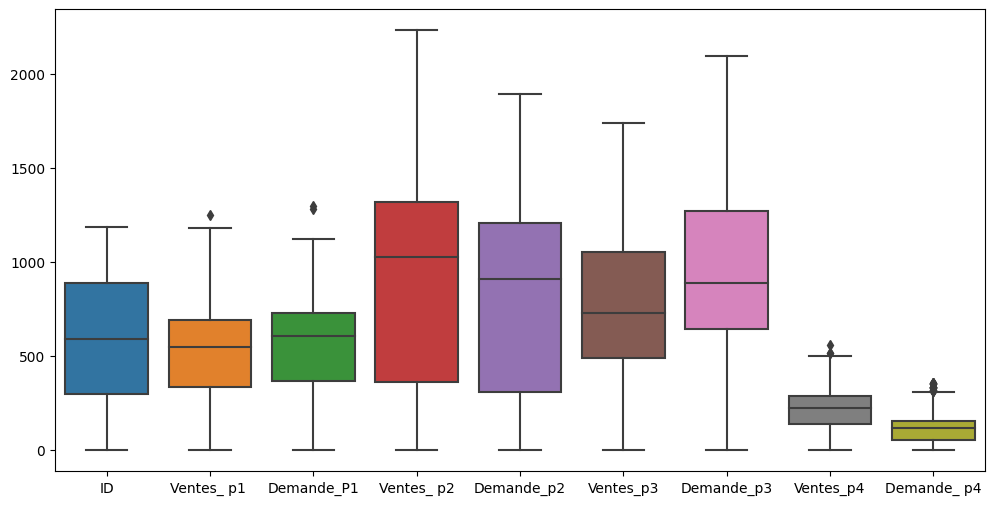

In [95]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = df)

En se basant sur la boîte à moustaches , on peut constater que certaines colonnes (Ventes_p1, Demande_p1, ventes_p4 et Demande_p4) contiennent des valeurs aberrantes. Plongeons plus en profondeur et examinons les lignes qui contiennent ces valeurs aberrantes en utilisant la méthode de (IQR)*texte en italique*










2.   **Methode mathématique:** *La méthode IQR*

In [96]:
#Pour ventes_p1:
from scipy.stats import iqr
IQR = iqr(df["Ventes_ p1 "])
lower_threshold_1 = np.quantile(df["Ventes_ p1 "], 0.25) - 1.5 * IQR
upper_threshold_1 = np.quantile(df["Ventes_ p1 "], 0.75) + 1.5 * IQR
T_outliers_1 = df[(df["Ventes_ p1 "] < lower_threshold_1) | (df["Ventes_ p1 "] > upper_threshold_1)]
T_outliers_1

,ID,Date,Ventes_ p1,Demande_P1,Ventes_ p2,Demande_p2,Ventes_p3,Demande_p3,Ventes_p4,Demande_ p4
1066,1067,2022-12-02,1251.5,619.0,1163.8,1628.0,488.0,787.0,210.5,322.0


In [97]:
# Pour Demande_p1:
from scipy.stats import iqr
IQR = iqr(df["Demande_P1"])
lower_threshold_2 = np.quantile(df["Demande_P1"], 0.25) - 1.5 * IQR
upper_threshold_2 = np.quantile(df["Demande_P1"], 0.75) + 1.5 * IQR
T_outliers_2 = df[(df["Demande_P1"] < lower_threshold_2) | (df["Demande_P1"] > upper_threshold_2)]
T_outliers_2

,ID,Date,Ventes_ p1,Demande_P1,Ventes_ p2,Demande_p2,Ventes_p3,Demande_p3,Ventes_p4,Demande_ p4
659,660,2021-10-21,1168.60,1282.828722,755.52,640.797023,1640.5,1973.994768,358.0,181.983333
896,897,2022-06-15,1180.14,1295.496738,1905.84,1616.445095,572.5,688.882661,317.0,161.141667


In [98]:
# Pour ventes_p4:
from scipy.stats import iqr
IQR = iqr(df["Ventes_p4"])
lower_threshold_3 = np.quantile(df["Ventes_p4"], 0.25) - 1.5 * IQR
upper_threshold_3 = np.quantile(df["Ventes_p4"], 0.75) + 1.5 * IQR
T_outliers_3 = df[(df["Ventes_p4"] < lower_threshold_3) | (df["Ventes_p4"] > upper_threshold_3)]
T_outliers_3

,ID,Date,Ventes_ p1,Demande_P1,Ventes_ p2,Demande_p2,Ventes_p3,Demande_p3,Ventes_p4,Demande_ p4
295,296,2020-10-22,529.41,581.158954,1295.30,1098.613384,1442.0,1735.142003,513.5,261.029167
343,344,2020-12-09,441.00,484.107023,1244.26,1055.323623,1118.0,1345.276532,517.0,262.808333
649,650,2021-10-11,809.54,888.671200,1169.06,991.542471,1277.5,1537.201046,558.5,283.904167


In [99]:
# Pour Demande_p4:
from scipy.stats import iqr
IQR = iqr(df["Demande_ p4"])
lower_threshold_4 = np.quantile(df["Demande_ p4"], 0.25) - 1.5 * IQR
upper_threshold_4 = np.quantile(df["Demande_ p4"], 0.75) + 1.5 * IQR
T_outliers_4 = df[(df["Demande_ p4"] < lower_threshold_4) | (df["Demande_ p4"] > upper_threshold_4)]
T_outliers_4

,ID,Date,Ventes_ p1,Demande_P1,Ventes_ p2,Demande_p2,Ventes_p3,Demande_p3,Ventes_p4,Demande_ p4
1020,1021,2022-10-17,728.500,972.0,926.22,1733.0,974.5,995.0,355.5,335.0
1021,1022,2022-10-18,758.180,936.0,1181.72,1669.0,551.5,958.0,253.5,322.0
1027,1028,2022-10-24,680.720,936.0,1518.14,1669.0,974.0,958.0,157.0,322.0
1065,1066,2022-12-01,543.160,647.0,1907.40,1702.0,493.0,823.0,217.0,337.0
1066,1067,2022-12-02,1251.500,619.0,1163.80,1628.0,488.0,787.0,210.5,322.0
1069,1070,2022-12-05,883.260,689.0,878.62,1813.0,805.5,876.0,177.5,359.0
1070,1071,2022-12-06,571.340,675.0,0.00,1776.0,434.5,859.0,147.5,351.0
1071,1072,2022-12-07,888.160,647.0,1337.42,1702.0,397.5,823.0,130.0,337.0
1072,1073,2022-12-08,679.400,633.0,1135.46,1665.0,491.0,805.0,242.0,329.0
1073,1074,2022-12-09,653.900,605.0,962.60,1591.0,394.5,769.0,152.5,315.0


**L'existence de valeurs aberrantes peut avoir un impact significatif sur les résultats d'une analyse statistique ou d'un modèle prédictif. C'est pourquoi il est courant de supprimer ces valeurs afin d'atténuer leur influence.**

In [100]:
# Suppression des valeurs aberrantes:
df= df[(df["Ventes_ p1 "] < upper_threshold_1) & (df["Ventes_ p1 "] > lower_threshold_1)]
df= df[(df["Demande_P1"] < upper_threshold_2) & (df["Demande_P1"] > lower_threshold_2)]
df= df[(df["Ventes_p4"] < upper_threshold_3) & (df["Ventes_p4"] > lower_threshold_3)]
df= df[(df["Demande_ p4"] < upper_threshold_4) & (df["Demande_ p4"] > lower_threshold_4)]

In [101]:
# Vérification des résultats après suppression des valeurs aberrantes:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1185
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID           1155 non-null   int64         
 1   Date         1155 non-null   datetime64[ns]
 2   Ventes_ p1   1155 non-null   float64       
 3   Demande_P1   1155 non-null   float64       
 4   Ventes_ p2   1155 non-null   float64       
 5   Demande_p2   1155 non-null   float64       
 6   Ventes_p3    1155 non-null   float64       
 7   Demande_p3   1155 non-null   float64       
 8   Ventes_p4    1155 non-null   float64       
 9   Demande_ p4  1155 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 99.3 KB


In [102]:
#Suppression du colonne ID:
df = df.drop(columns=("ID"))

In [103]:
df.head()

,Date,Ventes_ p1,Demande_P1,Ventes_ p2,Demande_p2,Ventes_p3,Demande_p3,Ventes_p4,Demande_ p4
0,2020-01-01,549.68,603.410313,711.68,603.613968,479.5,576.976831,299.5,152.245833
1,2020-01-02,635.40,697.509302,1047.44,888.390028,872.0,1049.267564,161.0,81.841667
2,2020-01-03,524.52,575.790965,1042.44,884.149260,883.0,1062.503737,260.5,132.420833
3,2020-01-04,550.84,604.683701,1190.78,1009.964368,829.0,997.526158,150.0,76.250000
4,2020-01-05,55.14,60.529844,27.34,23.188520,28.0,33.692078,0.0,0.000000


## **Analyse de lien entre les variables:**

In [104]:
df.corr()

,Ventes_ p1,Demande_P1,Ventes_ p2,Demande_p2,Ventes_p3,Demande_p3,Ventes_p4,Demande_ p4
Ventes_ p1,1.000000,0.978589,0.702155,0.728336,0.503784,0.527132,0.678559,0.545459
Demande_P1,0.978589,1.000000,0.707839,0.723608,0.526725,0.544948,0.693792,0.580021
Ventes_ p2,0.702155,0.707839,1.000000,0.942354,0.526479,0.539615,0.652100,0.550163
Demande_p2,0.728336,0.723608,0.942354,1.000000,0.478682,0.507258,0.631464,0.508141
Ventes_p3,0.503784,0.526725,0.526479,0.478682,1.000000,0.991067,0.697795,0.577592
Demande_p3,0.527132,0.544948,0.539615,0.507258,0.991067,1.000000,0.701397,0.583581
Ventes_p4,0.678559,0.693792,0.652100,0.631464,0.697795,0.701397,1.000000,0.796972
Demande_ p4,0.545459,0.580021,0.550163,0.508141,0.577592,0.583581,0.796972,1.000000


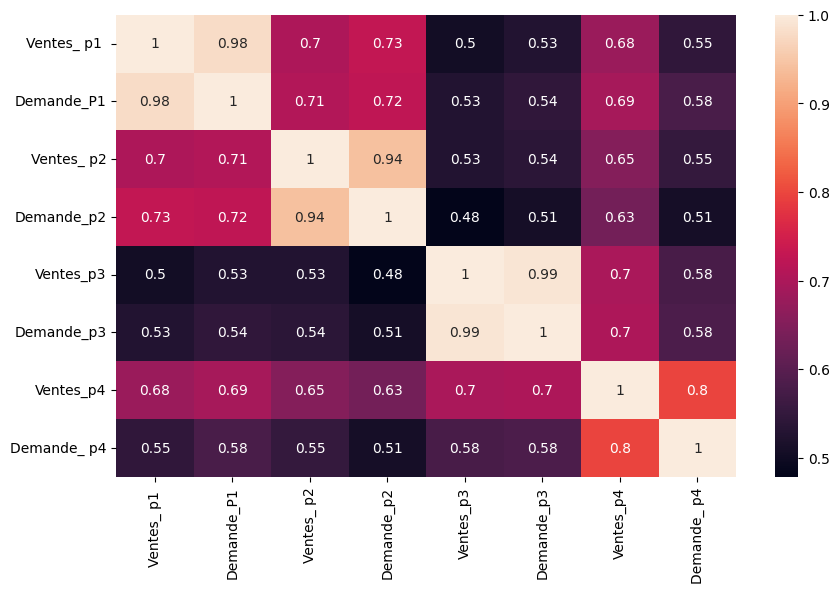

In [105]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot = True)
plt.show()

<Axes: xlabel='Demande_ p4', ylabel='Ventes_p4'>

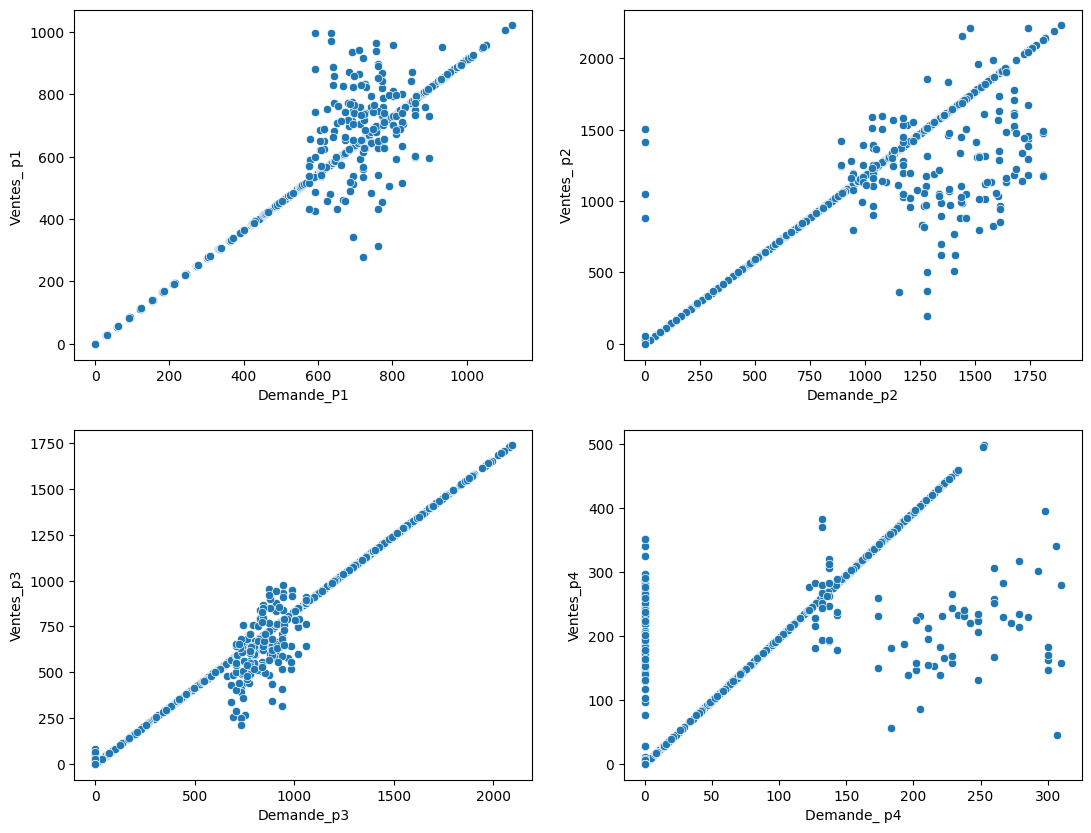

In [106]:
fig, axarr  = plt.subplots(2,2,figsize=(13,10))
sns.scatterplot(x='Demande_P1', y="Ventes_ p1 ", data=df, ax=axarr[0,0], palette='deep')
sns.scatterplot(x='Demande_p2', y='Ventes_ p2', data=df, ax=axarr[0,1], palette='deep')
sns.scatterplot(x='Demande_p3', y='Ventes_p3', data=df, ax=axarr[1,0], palette='deep')
sns.scatterplot(x='Demande_ p4', y='Ventes_p4', data=df, ax=axarr[1,1], palette='deep')

**D'après les résultats precedents, On peut confirmer l'existence d'une corrélation entre chaque vente et sa demande respective. Cependant, il convient de noter que la nature de cette corrélation est non linéaire.**

## Modélisation:

### Choix des variables pour la modélisation

##### **On commence par "Vente_p1" et "Demande_P1"**:

In [107]:
#On commence par "Ventes_p1" et "demande_P1":
X_1 = df['Demande_P1']
y_1 = df['Ventes_ p1 ']

***Diviser la base en un ensemble d'apprentissage et un ensemble de test (80 pour l'apprentissage et 20% pour le test)***

In [108]:
from sklearn import model_selection
X1_train, X1_test, y1_train, y1_test = model_selection.train_test_split(X_1, y_1, test_size = 0.20, random_state = 42)

In [109]:
# Verification après la division du base:
X1_train.shape , y1_train.shape, X1_test.shape, y1_test.shape

((924,), (924,), (231,), (231,))

In [110]:
#Remodelage des données d'entraînement et de test
X1_train = np.array(X1_train).reshape(-1, 1)
y1_train = np.array(y1_train).reshape(-1, 1)
X1_test = np.array(X1_test).reshape(-1, 1)
y1_test = np.array(y1_test).reshape(-1, 1)

### Modèle de régression utilisant  les arbres de décision:

In [111]:
#Importation de la librairie
from sklearn.tree import DecisionTreeRegressor
# Création du modèle Arbre de décision
tree1 = DecisionTreeRegressor()
# Apprentissage du modèle utilisant la base d'apprentissage
tree1.fit(X1_train,y1_train)

DecisionTreeRegressor()

### Modèle de régression utilisant  K-nearest neighbors (kNN):


**Le choix de la valeur de K est important et peut avoir un impact significatif sur les prédictions du modèle. C'est pourpour cela on va utiliser une méthode graphique pour décider du nombre optimal de voisins (K) à choisir.**

In [112]:
#Importation de la librairie
from sklearn.neighbors import KNeighborsRegressor

#Création du modèle KNN
knn_5 = KNeighborsRegressor() # K=5 valeure par défaut
# Apprentissage du modèle utilisant la base d'apprentissage
knn_5.fit(X1_train,y1_train)

KNeighborsRegressor()

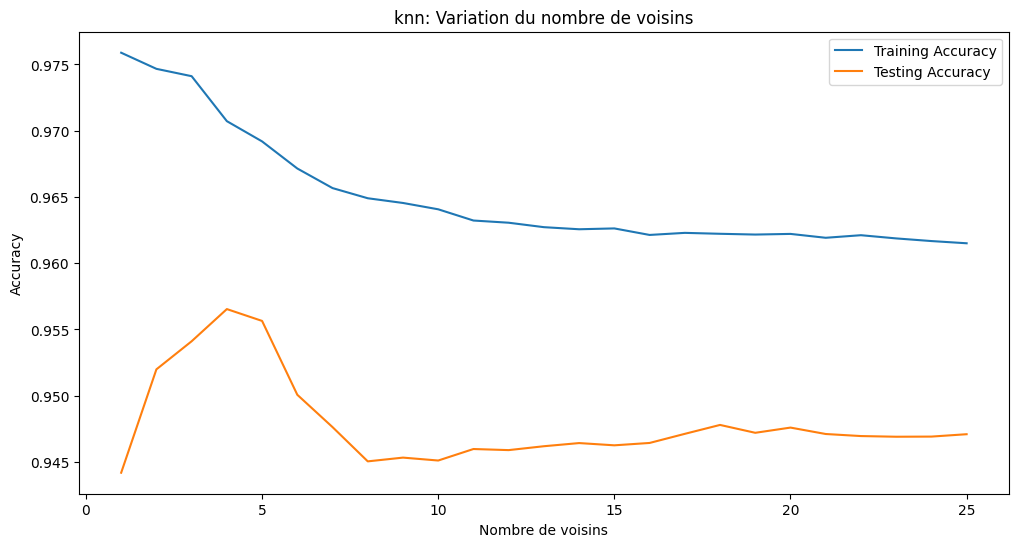

In [113]:
#Créetion un dictionnaire vide pour stocker nos "train & test accuracies"
train_accuracies = {}
test_accuracies = {}

# Création d'un tableau numpy contenant une plage de valeurs de k (nombre de k) :
neighbors = np.arange(1, 26)
#
for neighbor in neighbors:
   knn = KNeighborsRegressor(n_neighbors=neighbor)
   knn.fit(X1_train, y1_train)
   train_accuracies[neighbor] = knn.score(X1_train, y1_train)
   test_accuracies[neighbor] = knn.score(X1_test, y1_test)

# Representation graphique des résulatas:
plt.figure(figsize = (12, 6))
plt.title("knn: Variation du nombre de voisins")
plt.plot(neighbors, train_accuracies.values(), label = "Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label = "Testing Accuracy")
plt.legend()
plt.xlabel("Nombre de voisins")
plt.ylabel("Accuracy")
plt.show()

**En se basant sur la ligne orange qui représente "testing accuracy" on peut choisir soit K = 3 ou K = 5.**

In [114]:
#Importation de la librairie
from sklearn.neighbors import KNeighborsRegressor

#Création du modèle KNN
knn_5_1 = KNeighborsRegressor() # K=5 valeure par défaut
# Apprentissage du modèle utilisant la base d'apprentissage
knn_5_1.fit(X1_train,y1_train)

KNeighborsRegressor()

In [115]:
#Affichages des hyperparameter du modèle KNN
knn_5_1.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [116]:
# Création du modèle KNN avec K=3
knn_3_1 = KNeighborsRegressor(n_neighbors=3)
# Apprentissage du modèle utilisant la base d'apprentissage
knn_3_1.fit(X1_train,y1_train)

KNeighborsRegressor(n_neighbors=3)

### Evaluation des modèles:

In [117]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### Evaluation du modèle Arbre de décision:

In [118]:
# Prédiction de y utilisant le modèle arbre de décision
pred_tree1= tree1.predict(X1_test)

In [119]:
# Clacul de MAE, MSE, RMSE, R et R²
mae_TREE = mean_absolute_error(y1_test, pred_tree1)
mse_TREE = mean_squared_error(y1_test, pred_tree1)
rmse_TREE= np.sqrt(mse_TREE)
r2_score = tree1.score(X1_test, y1_test)
r_score = np.sqrt(r2_score)
print ("MAE Modèle TREE=", mae_TREE)
print ("MSE Modèle TREE=", mse_TREE)
print("RMSE Modèle TREE=" , rmse_TREE)
print("R= ", r_score)
print("R²= ", r2_score)

MAE Modèle TREE= 19.527320346320344
MSE Modèle TREE= 3199.318648478354
RMSE Modèle TREE= 56.56251982079966
R=  0.9764951726070256
R²=  0.9535428221248247


### Evaluation du modèle KNN:

In [120]:
# Prédiction de y utilisant les modèles KNN (K=5 et K=3)
pred_5_1 = knn_5_1.predict(X1_test)
pred_3_1 = knn_3_1.predict(X1_test)

In [121]:
# Clacul de MAE, MSE, RMSE, R et R² pour le modèle KNN (K = 5)
mae_KNN_5_1 = mean_absolute_error(y1_test, pred_5_1)
mse_KNN_5_1 = mean_squared_error(y1_test, pred_5_1)
rmse_KNN_5_1 = np.sqrt(mse_KNN_5_1)
r2_score = knn_5_1.score(X1_test, y1_test)
r_score = np.sqrt(r2_score)
print ("MAE KNN (K=5)=", mae_KNN_5_1)
print ("MSE KNN (K=5)=", mse_KNN_5_1)
print("RMSE KNN (K=5)=" , rmse_KNN_5_1)
print("R= ", r_score)
print("R²= ", r2_score)

MAE KNN (K=5)= 20.656520346320352
MSE KNN (K=5)= 3054.381512921732
RMSE KNN (K=5)= 55.26645920376781
R=  0.9775722216090144
R²=  0.9556474484615838


In [122]:
# Clacul de MAE, MSE, RMSE, R et R² pour le modèle KNN (K = 3)
mae_KNN_3_1 = mean_absolute_error(y1_test, pred_3_1)
mse_KNN_3_1 = mean_squared_error(y1_test, pred_3_1)
rmse_KNN_3_1 = np.sqrt(mse_KNN_3_1)
r2_score = knn_3_1.score(X1_test, y1_test)
r_score = np.sqrt(r2_score)
print ("MAE KNN (K=3)=", mae_KNN_3_1)
print ("MSE KNN (K=3)=", mse_KNN_3_1)
print("RMSE KNN (K=3)=" , rmse_KNN_3_1)
print("R= ", r_score)
print("R²= ", r2_score)

MAE KNN (K=3)= 21.023178932178936
MSE KNN (K=3)= 3160.142493614718
RMSE KNN (K=3)= 56.21514469975789
R=  0.9767864134494978
R²=  0.9541116974995332


#### Conclusion :
**En se basant sur les métriques d'évaluation des modèles KNN avec k = 5 et k = 3, on peut conclure que le modèle KNN avec k = 5 est meilleur que le modèle avec k = 3.**

* **Maintenant, nous allons effectuer la même démarche pour les autres variables**

In [123]:
df.columns

Index(['Date', 'Ventes_ p1 ', 'Demande_P1', 'Ventes_ p2', 'Demande_p2',
       'Ventes_p3', 'Demande_p3', 'Ventes_p4', 'Demande_ p4'],
      dtype='object')

In [124]:
#On commence par "Ventes_p2" et "demande_P2":
X_2 = df['Demande_p2']
y_2 = df['Ventes_ p2']

* **Diviser la base en un ensemble d'apprentissage et un ensemble de test (80 pour l'apprentissage et 20% pour le test)**

In [125]:
from sklearn import model_selection
X2_train, X2_test, y2_train, y2_test = model_selection.train_test_split(X_2, y_2, test_size = 0.20, random_state = 42)

In [126]:
# Verification après la division du base:
X2_train.shape , y2_train.shape, X2_test.shape, y2_test.shape

((924,), (924,), (231,), (231,))

In [127]:
#Remodelage des données d'entraînement et de test
X2_train = np.array(X2_train).reshape(-1, 1)
y2_train = np.array(y2_train).reshape(-1, 1)
X2_test = np.array(X2_test).reshape(-1, 1)
y2_test = np.array(y2_test).reshape(-1, 1)

### Modèle de régression utilisant  les arbres de décision:

In [128]:
#Importation de la librairie
from sklearn.tree import DecisionTreeRegressor
# Création du modèle Arbre de décision
tree2 = DecisionTreeRegressor()
# Apprentissage du modèle utilisant la base d'apprentissage
tree2.fit(X2_train,y2_train)

DecisionTreeRegressor()

### Modèle de régression utilisant K-nearest neighbors (kNN):

D'après l'exemple précédent, nous avons constaté que le modèle KNN avec k = 5 est meilleur que le modèle avec k = 3. Par conséquent, dans cette étape, nous avons choisi le modèle en fixant k = 5.

In [129]:
#Importation de la librairie
from sklearn.neighbors import KNeighborsRegressor

#Création du modèle KNN
knn_2 = KNeighborsRegressor() # K=5 valeur par défaut
# Apprentissage du modèle utilisant la base d'apprentissage
knn_2.fit(X2_train,y2_train)

KNeighborsRegressor()

In [130]:
#Affichages des hyperparameter du modèle KNN
knn_2.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

### Evaluation des modèles:

In [131]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

* **Evaluation du modèle Arbre de décision:**

In [132]:
# Prédiction de y utilisant le modèle arbre de décision
pred_tree_2= tree2.predict(X1_test)

In [133]:
# Clacul de MAE, MSE, RMSE, R et R²
mae_TREE = mean_absolute_error(y2_test, pred_tree_2)
mse_TREE = mean_squared_error(y2_test, pred_tree_2)
rmse_TREE= np.sqrt(mse_TREE)
r2_score = tree2.score(X2_test, y2_test)
r_score = np.sqrt(r2_score)
print ("MAE Modèle TREE=", mae_TREE)
print ("MSE Modèle TREE=", mse_TREE)
print("RMSE Modèle TREE=" , rmse_TREE)
print("R= ", r_score)
print("R²= ", r2_score)

MAE Modèle TREE= 368.0846911732336
MSE Modèle TREE= 235200.27657153804
RMSE Modèle TREE= 484.9745112596517
R=  0.9663324948147831
R²=  0.9337984905349629


* **Evaluation du modèle KNN:**

In [134]:
# Prédiction de y utilisant le modèle arbre de décision
pred_2 = knn_2.predict(X2_test)

In [135]:
# Clacul de MAE, MSE, RMSE, R et R² pour le modèle KNN (K = 5)
mae_KNN_2 = mean_absolute_error(y2_test, pred_2)
mse_KNN_2 = mean_squared_error(y2_test, pred_2)
rmse_KNN_2 = np.sqrt(mse_KNN_2)
r2_score = knn_2.score(X2_test, y2_test)
r_score = np.sqrt(r2_score)
print ("MAE KNN (K=5)=", mae_KNN_2)
print ("MSE KNN (K=5)=", mse_KNN_2)
print("RMSE KNN (K=5)=" , rmse_KNN_2)
print("R= ", r_score)
print("R²= ", r2_score)

MAE KNN (K=5)= 52.37927619047618
MSE KNN (K=5)= 21240.994147946316
RMSE KNN (K=5)= 145.74290427992133
R=  0.9654130655952027
R²=  0.9320223872219271


**Alors maintenant, nous allons créer des modèles d'arbre de décision et de modèle KNN pour prédire les ventes du produit P3 en fonction de sa demande**.

In [136]:
df.columns

Index(['Date', 'Ventes_ p1 ', 'Demande_P1', 'Ventes_ p2', 'Demande_p2',
       'Ventes_p3', 'Demande_p3', 'Ventes_p4', 'Demande_ p4'],
      dtype='object')

In [137]:
#On commence par "Ventes_p3" et "demande_P3":
X_3 = df['Demande_p3']
y_3 = df['Ventes_p3']

***Diviser la base en un ensemble d'apprentissage et un ensemble de test (80 pour l'apprentissage et 20% pour le test)***

In [138]:
from sklearn import model_selection
X3_train, X3_test, y3_train, y3_test = model_selection.train_test_split(X_3, y_3, test_size = 0.20, random_state = 42)

In [139]:
# Verification après la division du base:
X3_train.shape , y3_train.shape, X3_test.shape, y3_test.shape

((924,), (924,), (231,), (231,))

In [140]:
#Remodelage des données d'entraînement et de test
X3_train = np.array(X3_train).reshape(-1, 1)
y3_train = np.array(y3_train).reshape(-1, 1)
X3_test = np.array(X3_test).reshape(-1, 1)
y3_test = np.array(y3_test).reshape(-1, 1)

### Modèle de régression utilisant  les arbres de décision:

In [141]:
#Importation de la librairie
from sklearn.tree import DecisionTreeRegressor
# Création du modèle Arbre de décision
tree3 = DecisionTreeRegressor()
# Apprentissage du modèle utilisant la base d'apprentissage
tree3.fit(X3_train,y3_train)

DecisionTreeRegressor()

### Modèle de régression utilisant K-nearest neighbors (kNN):

*D'après l'exemple précédent, nous avons constaté que le modèle KNN avec k = 5 est meilleur que le modèle avec k = 3. Par conséquent, dans cette étape, nous avons choisi le modèle en fixant k = 5.*

In [142]:
#Importation de la librairie
from sklearn.neighbors import KNeighborsRegressor

#Création du modèle KNN
knn_3 = KNeighborsRegressor() # K=5 valeur par défaut
# Apprentissage du modèle utilisant la base d'apprentissage
knn_3.fit(X3_train,y3_train)

KNeighborsRegressor()

In [143]:
#Affichages des hyperparameter du modèle KNN
knn_3.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

### Evaluation des modèles:

In [144]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

* **Evaluation du modèle Arbre de décision:**

In [145]:
# Prédiction de y utilisant le modèle arbre de décision
pred_tree_3= tree3.predict(X3_test)

In [146]:
# Clacul de MAE, MSE, RMSE, R et R²
mae_TREE = mean_absolute_error(y3_test, pred_tree_3)
mse_TREE = mean_squared_error(y3_test, pred_tree_3)
rmse_TREE= np.sqrt(mse_TREE)
r2_score = tree3.score(X3_test, y3_test)
r_score = np.sqrt(r2_score)
print ("MAE Modèle TREE=", mae_TREE)
print ("MSE Modèle TREE=", mse_TREE)
print("RMSE Modèle TREE=" , rmse_TREE)
print("R= ", r_score)
print("R²= ", r2_score)

MAE Modèle TREE= 15.576142376142379
MSE Modèle TREE= 2171.7671180054513
RMSE Modèle TREE= 46.602222243209084
R=  0.9935125695261005
R²=  0.9870672258063546


* **Evaluation du modèle KNN:**

In [147]:
# Prédiction de y utilisant le modèle KNN (K=5 )
pred_3 = knn_3.predict(X3_test)

In [148]:
# Clacul de MAE, MSE, RMSE, R et R² pour le modèle KNN (K = 5)
mae_KNN_5_3 = mean_absolute_error(y3_test, pred_3)
mse_KNN_5_3 = mean_squared_error(y3_test, pred_3)
rmse_KNN_5_3 = np.sqrt(mse_KNN_5_3)
r2_score = knn_5.score(X3_test, y3_test)
r_score = np.sqrt(r2_score)
print ("MAE KNN (K=5)=", mae_KNN_5_3)
print ("MSE KNN (K=5)=", mse_KNN_5_3)
print("RMSE KNN (K=5)=" , rmse_KNN_5_3)
print("R= ", r_score)
print("R²= ", r2_score)

MAE KNN (K=5)= 18.38632034632035
MSE KNN (K=5)= 2120.4473376623373
RMSE KNN (K=5)= 46.0483152532461
R=  0.8788712756560236
R²=  0.7724147191732463


 **Maintenant, nous allons effectuer la même démarche pour créer des modèles d'arbre de décision et de modèle KNN afin de prévoir les ventes du produit P4 en se basant sur sa demande.**

In [149]:
#On commence par "Ventes_p3" et "demande_P3":
X_4 = df['Demande_ p4']
y_4 = df['Ventes_p4']

* **Diviser la base en un ensemble d'apprentissage et un ensemble de test (80 pour l'apprentissage et 20% pour le test)**

In [150]:
from sklearn import model_selection
X4_train, X4_test, y4_train, y4_test = model_selection.train_test_split(X_4, y_4, test_size = 0.20, random_state = 42)

In [151]:
# Verification après la division du base:
X4_train.shape , y4_train.shape, X4_test.shape, y4_test.shape

((924,), (924,), (231,), (231,))

In [152]:
#Remodelage des données d'entraînement et de test
X4_train = np.array(X4_train).reshape(-1, 1)
y4_train = np.array(y4_train).reshape(-1, 1)
X4_test = np.array(X4_test).reshape(-1, 1)
y4_test = np.array(y4_test).reshape(-1, 1)

### Modèle de régression utilisant  les arbres de décision:

In [153]:
#Importation de la librairie
from sklearn.tree import DecisionTreeRegressor
# Création du modèle Arbre de décision
tree4 = DecisionTreeRegressor()
# Apprentissage du modèle utilisant la base d'apprentissage
tree4.fit(X4_train,y4_train)

DecisionTreeRegressor()

### Modèle de régression utilisant  K-nearest neighbors (kNN):

D'après l'exemple précédent, nous avons constaté que le modèle KNN avec k = 5 est meilleur que le modèle avec k = 3. Par conséquent, dans cette étape, nous avons choisi le modèle en fixant k = 5.

In [154]:
#Importation de la librairie
from sklearn.neighbors import KNeighborsRegressor

#Création du modèle KNN
knn_5 = KNeighborsRegressor() # K=5 valeur par défaut
# Apprentissage du modèle utilisant la base d'apprentissage
knn_5.fit(X4_train,y4_train)

KNeighborsRegressor()

In [155]:
#Affichages des hyperparameter du modèle KNN
knn_5.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

### Evaluation des modèles:

In [156]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

* **Evaluation du modèle Arbre de décision:**

In [157]:
# Prédiction de y utilisant le modèle arbre de décision
pred_tree4= tree4.predict(X4_test)

In [158]:
# Clacul de MAE, MSE, RMSE, R et R²
mae_TREE = mean_absolute_error(y4_test, pred_tree4)
mse_TREE = mean_squared_error(y4_test, pred_tree4)
rmse_TREE= np.sqrt(mse_TREE)
r2_score = tree4.score(X4_test, y4_test)
r_score = np.sqrt(r2_score)
print ("MAE Modèle TREE=", mae_TREE)
print ("MSE Modèle TREE=", mse_TREE)
print("RMSE Modèle TREE=" , rmse_TREE)
print("R= ", r_score)
print("R²= ", r2_score)

MAE Modèle TREE= 24.12747448825293
MSE Modèle TREE= 3357.1511691548517
RMSE Modèle TREE= 57.94092827315465
R=  0.8693783415099817
R²=  0.7558187006866465


* **Evaluation du modèle KNN:**

In [159]:
# Prédiction de y utilisant les modèles KNN (K=5 )
pred_4 = knn_5.predict(X4_test)

In [160]:
# Clacul de MAE, MSE, RMSE, R et R² pour le modèle KNN (K = 5)
mae_KNN_5_4 = mean_absolute_error(y4_test, pred_4)
mse_KNN_5_4= mean_squared_error(y4_test, pred_4)
rmse_KNN_5_4 = np.sqrt(mse_KNN_5_4)
r2_score = knn_5.score(X4_test, y4_test)
r_score = np.sqrt(r2_score)
print ("MAE KNN (K=5)=", mae_KNN_5_4)
print ("MSE KNN (K=5)=", mse_KNN_5_4)
print("RMSE KNN (K=5)=" , rmse_KNN_5_4)
print("R= ", r_score)
print("R²= ", r2_score)

MAE KNN (K=5)= 28.440692640692646
MSE KNN (K=5)= 3260.0095238095237
RMSE KNN (K=5)= 57.096493095544176
R=  0.8734324625823504
R²=  0.762884266692669


In [161]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
nouveau_valeur = [[400]]
prediction = tree4.predict(nouveau_valeur)
print("La prédiction pour la nouvelle valeur est :", prediction)

La prédiction pour la nouvelle valeur est : [218.5]


In [162]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
nouveau_valeur = [[400]]
prediction = tree1.predict(nouveau_valeur)
print("La prédiction pour la nouvelle valeur est :", prediction)

La prédiction pour la nouvelle valeur est : [364.08]


In [163]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
nouveau_valeur = [[400]]
prediction = tree2.predict(nouveau_valeur)
print("La prédiction pour la nouvelle valeur est :", prediction)

La prédiction pour la nouvelle valeur est : [471.48]


In [164]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
nouveau_valeur = [[400]]
prediction = tree3.predict(nouveau_valeur)
print("La prédiction pour la nouvelle valeur est :", prediction)

La prédiction pour la nouvelle valeur est : [333.]


## ETULISATION DES MODELLES

In [165]:
import pickle

import os

# Créer le répertoire "modèles" s'il n'existe pas déjà
os.makedirs("ventes1", exist_ok=True)

# Sauvegarder le modèle
with open('ventes1/ventes1.pkl', 'wb') as file:
    pickle.dump(tree1, file)
# Charger le modèle à partir du fichier
with open('ventes1/ventes1.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Effectuer une prédiction avec le modèle chargé
nouvelle_valeur = [[400]]
prediction = loaded_model.predict(nouvelle_valeur)
print("La prédiction pour la nouvelle valeur est :", prediction)

La prédiction pour la nouvelle valeur est : [364.08]


In [166]:
import pickle

import os

# Créer le répertoire "modèles" s'il n'existe pas déjà
os.makedirs("ventes2", exist_ok=True)

# Sauvegarder le modèle
with open('ventes2/ventes2.pkl', 'wb') as file:
    pickle.dump(tree2, file)
# Charger le modèle à partir du fichier
with open('ventes2/ventes2.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Effectuer une prédiction avec le modèle chargé
nouvelle_valeur = [[400]]
prediction = loaded_model.predict(nouvelle_valeur)
print("La prédiction pour la nouvelle valeur est :", prediction)

La prédiction pour la nouvelle valeur est : [471.48]


In [167]:
import pickle

import os

# Créer le répertoire "modèles" s'il n'existe pas déjà
os.makedirs("ventes3", exist_ok=True)

# Sauvegarder le modèle
with open('ventes3/ventes3.pkl', 'wb') as file:
    pickle.dump(tree3, file)
# Charger le modèle à partir du fichier
with open('ventes3/ventes3.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Effectuer une prédiction avec le modèle chargé
nouvelle_valeur = [[400]]
prediction = loaded_model.predict(nouvelle_valeur)
print("La prédiction pour la nouvelle valeur est :", prediction)

La prédiction pour la nouvelle valeur est : [333.]


In [168]:
import pickle

import os

# Créer le répertoire "modèles" s'il n'existe pas déjà
os.makedirs("ventes4", exist_ok=True)

# Sauvegarder le modèle
with open('ventes4/ventes4.pkl', 'wb') as file:
    pickle.dump(tree4, file)
# Charger le modèle à partir du fichier
with open('ventes4/ventes4.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Effectuer une prédiction avec le modèle chargé
nouvelle_valeur = [[400]]
prediction = loaded_model.predict(nouvelle_valeur)
print("La prédiction pour la nouvelle valeur est :", prediction)

La prédiction pour la nouvelle valeur est : [218.5]
